#Project | Deep Learning
##**Dateset**: Higgs Boson Dataset
---
##Objective :
Project is focused on binary classification using deep learning on the Higgs Boson Signal Classification dataset.


##Key Dataset Insights:
The dataset was created to help identify Higgs boson decay events (signal) from background noise using simulated data from the ATLAS experiment at CERN. It’s a binary classification task: signal (s) vs. background (b).

##Structure:

**Features:** 30 total

**21 low-level features:** Directly measured kinematic properties (e.g., momentum, angles).

**7 high-level features:** Engineered by physicists to help distinguish signal from background.

**1 weight:** Importance of each event .

**1 label:** s for signal, b for background.

**Missing values:** Represented as '-999.0' for undefined features

---

* Importing relevant libraries
* Loading the dataset( training and test sets)
* Exploring the structure and features

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, regularizers

In [2]:
train_df=pd.read_csv('/content/training.csv')
test_df=pd.read_csv('/content/test.csv')


In [3]:
print('Shape\n')
print(train_df.shape)
print('----------------------------------------------')
print('\nColumns\n')
print(train_df.columns)
print('----------------------------------------------')
print('\nInfo\n')
print(train_df.info())
print('----------------------------------------------')
print('\nStatistical Description\n')
print(train_df.describe())


Shape

(166053, 33)
----------------------------------------------

Columns

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')
----------------------------------------------

Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166053 entries, 0 to 166052
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  

---

#1. **Data Preprocessing**:





* Encode Labels:   
---

In [13]:
print(train_df['Label'].unique())

['s' 'b']


In [3]:
train_df['Label'] = train_df['Label'].map({'s': 1, 'b': 0})



Handling any missing or zero-filled values

---
     * In the Higgs dataset,the value -999.0 is not a real measurement.It's used as a placeholder to indicate missing data.
     * Replaced all ' -999.0' placeholders with 'np.nan' to flag the missing values.
     * Mean imputation can work fine if data is roughly symmetric and doesn’t have heavy outliers—but in the Higgs Boson dataset, many features tend to be skewed or have extreme values. Will use median impuation since it is robust to outliers.



In [4]:
train_df.replace(-999.0,np.nan,inplace=True)
print("Missing Values Count\n")
print(train_df.isnull().sum())


Missing Values Count

EventId                             0
DER_mass_MMC                    32554
DER_mass_transverse_met_lep         0
DER_mass_vis                        1
DER_pt_h                            1
DER_deltaeta_jet_jet           151535
DER_mass_jet_jet               151535
DER_prodeta_jet_jet            151535
DER_deltar_tau_lep                  1
DER_pt_tot                          1
DER_sum_pt                          1
DER_pt_ratio_lep_tau                1
DER_met_phi_centrality              1
DER_lep_eta_centrality         151535
PRI_tau_pt                          1
PRI_tau_eta                         1
PRI_tau_phi                         1
PRI_lep_pt                          1
PRI_lep_eta                         1
PRI_lep_phi                         1
PRI_met                             1
PRI_met_phi                         1
PRI_met_sumet                       1
PRI_jet_num                         1
PRI_jet_leading_pt              85383
PRI_jet_leading_eta         

* Plotting Histograms for features with higher number of missing values ,to better evaluate the distribution pattern.

In [5]:
# Remove trailing spaces from the column names
temporary=train_df[['DER_mass_MMC','DER_deltaeta_jet_jet','DER_mass_jet_jet','DER_prodeta_jet_jet','DER_lep_eta_centrality','PRI_jet_leading_pt','PRI_jet_leading_eta','PRI_jet_leading_phi','PRI_jet_subleading_pt','PRI_jet_subleading_eta','PRI_jet_subleading_phi']]

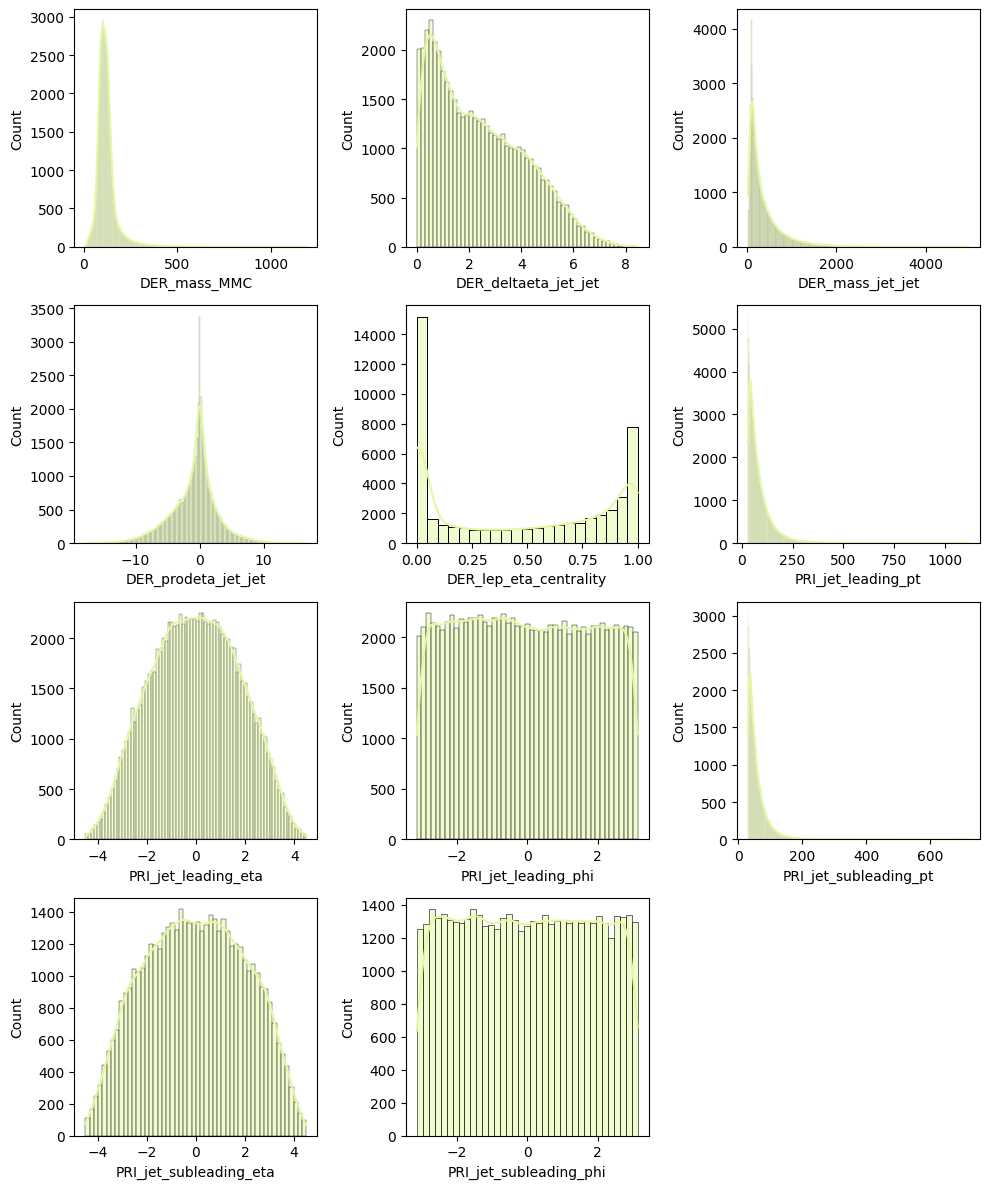

In [6]:
#histplot for temporary
plt.figure(figsize=(10, 12))  # width × height in inches

for i, col in enumerate(temporary.columns):  # limit to 12 plots
    plt.subplot(4, 3, i+1)
    sns.histplot(temporary[col], kde=True,color="#E4F8A3",edgecolor="black")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [5]:
# Median Imputation

train_df.fillna(train_df.select_dtypes(include=np.number).median(), inplace=True)

In [16]:
print(train_df.isnull().sum())

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

* Feature / Target Split

---

In [6]:
X = train_df.drop(['Label', 'Weight', 'KaggleSet', 'EventId'], axis=1, errors='ignore')
y = train_df['Label']


*  Normalize Features

---

In [7]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

Train / Validation / Test Split

---

* First Split of 15% Test set

* Second split for remaining 85% into 70% train and 15 % validation set ( 0.176 is 15% of 85%).

In [8]:
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (149443, 30)
Validation shape: (32031, 30)
Test shape: (32025, 30)


#2. **Model Building**

---

* Define and Train a Baseline MLP Model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import SGD,Adam


baseline_model=Sequential([Input(shape=(X_train.shape[1],)),
                           Dense(256,activation='relu'),
                           Dense(128,activation='relu'),
                           Dense(1,activation='sigmoid')])

baseline_model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,961 (160.00 KB)

 Trainable params: 40,961 (160.00 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
baseline_model.compile(optimizer=Adam(learning_rate=0.01),metrics=['accuracy'],loss='binary_crossentropy')

In [25]:
history_baseline_model = baseline_model.fit(X_train, y_train,epochs=30,validation_data=(X_val, y_val),
    batch_size=256,verbose=1)

Epoch 1/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7964 - loss: 0.4378 - val_accuracy: 0.8274 - val_loss: 0.3836
Epoch 2/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8288 - loss: 0.3820 - val_accuracy: 0.8341 - val_loss: 0.3708
Epoch 3/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8299 - loss: 0.3781 - val_accuracy: 0.8340 - val_loss: 0.3680
Epoch 4/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8335 - loss: 0.3718 - val_accuracy: 0.8337 - val_loss: 0.3683
Epoch 5/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8319 - loss: 0.3733 - val_accuracy: 0.8330 - val_loss: 0.3693
Epoch 6/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8325 - loss: 0.3702 - val_accuracy: 0.8342 - val_loss: 0.3688
Epoch 7/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8325 - loss: 0.3716 - val_accuracy: 0.8341 - val_loss: 0.3709
Epoch 8/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8342 - loss: 0.3683 - val_accuracy: 0.

In [9]:
def plot_learning_curves(history, title='Model'):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Train Accuracy')
    plt.plot(epochs, val_acc, 'r--', label='Val Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Train Loss')
    plt.plot(epochs, val_loss, 'r--', label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


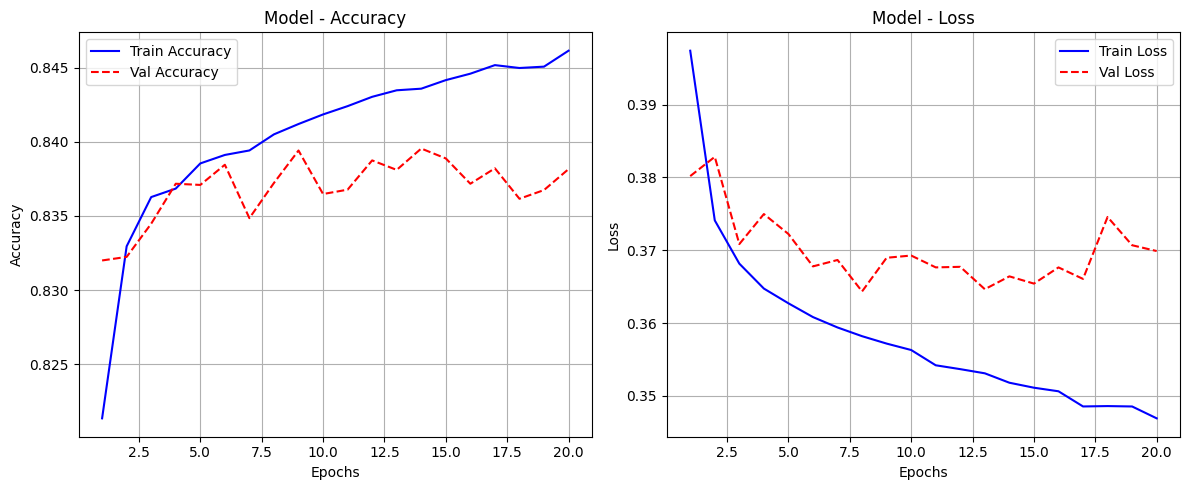

In [70]:
plot_learning_curves(history_baseline_model)

* *Validation accuracy fluctuates, but overall, it shows a slight upward trend.*

* *Validation Loss is unstable,but general direction is down.*


In [27]:
loss_bl,acc_bl=baseline_model.evaluate(X_test,y_test)
print(f'Test Loss: {100*loss_bl:.2f}%')
print(f'Test Accuracy: {100*acc_bl:.2f}%')

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8324 - loss: 0.3764
Test Loss: 37.48%
Test Accuracy: 83.14%


## Architectural Modifications

**Deeper and Wider Configurations.**

----

In [37]:
Deep_mlp=Sequential([Input(shape=(X_train.shape[1],)),
                     Dense(512,activation='relu'),
                     Dense(256,activation='relu'),
                     Dense(128,activation='relu'),
                     Dense(128,activation='relu'),
                     Dense(1,activation='sigmoid')])
Deep_mlp.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 512)            │        15,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 196,737 (768.50 KB)

 Trainable params: 196,737 (768.50 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
Deep_mlp.compile(optimizer=Adam(learning_rate=0.01),metrics=['accuracy'],loss='binary_crossentropy')

In [39]:
history_Deep_mlp = Deep_mlp.fit(X_train, y_train,epochs=30,validation_data=(X_val, y_val),
    batch_size=256,verbose=1)

Epoch 1/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.7902 - loss: 0.4544 - val_accuracy: 0.8286 - val_loss: 0.3805
Epoch 2/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8270 - loss: 0.3832 - val_accuracy: 0.8278 - val_loss: 0.3810
Epoch 3/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8293 - loss: 0.3801 - val_accuracy: 0.8353 - val_loss: 0.3681
Epoch 4/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8309 - loss: 0.3756 - val_accuracy: 0.8338 - val_loss: 0.3765
Epoch 5/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.8320 - loss: 0.3720 - val_accuracy: 0.8305 - val_loss: 0.3800
Epoch 6/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8336 - loss: 0.3711 - val_accuracy: 0.8359 - val_loss: 0.3668
Epoch 7/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8328 - loss: 0.3713 - val_accuracy: 0.8365 - val_loss: 0.3639
Epoch 8/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.8324 - loss: 0.3701 - val_

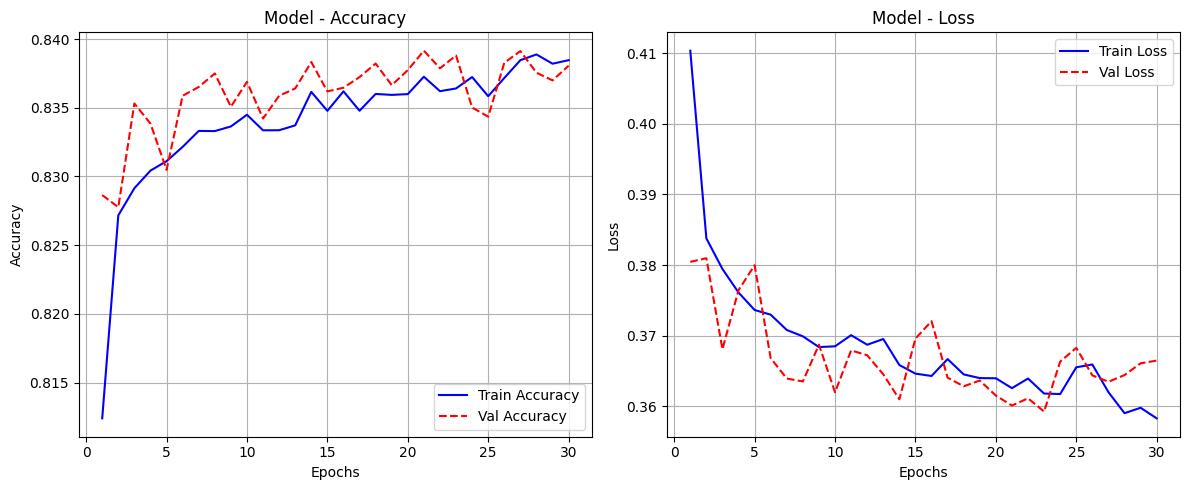

In [40]:
plot_learning_curves(history_Deep_mlp)

* *The validation accuracy starts just above 82%, dips slightly in the middle, then picks up to match training at the end*

* *Validation loss is a bit unstable but finishes near the same point as training loss*

---

##Evaluating Other Optimizers Performance

---

1. **RMSprop**

In [41]:
from tensorflow.keras.optimizers import RMSprop

model_rmsprop = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_rmsprop.compile(optimizer=RMSprop(learning_rate=0.001),loss='binary_crossentropy',
    metrics=['accuracy'])

In [42]:
history_rmsprop = model_rmsprop.fit(X_train, y_train,epochs=30,validation_data=(X_val, y_val),
    batch_size=256,verbose=1)


Epoch 1/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7944 - loss: 0.4375 - val_accuracy: 0.8270 - val_loss: 0.3804
Epoch 2/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8283 - loss: 0.3805 - val_accuracy: 0.8340 - val_loss: 0.3690
Epoch 3/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8316 - loss: 0.3746 - val_accuracy: 0.8343 - val_loss: 0.3683
Epoch 4/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8330 - loss: 0.3704 - val_accuracy: 0.8358 - val_loss: 0.3663
Epoch 5/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8329 - loss: 0.3684 - val_accuracy: 0.8324 - val_loss: 0.3701
Epoch 6/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8349 - loss: 0.3655 - val_accuracy: 0.8376 - val_loss: 0.3598
Epoch 7/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8360 - loss: 0.3650 - val_accuracy: 0.8386 - val_loss: 0.3600
Epoch 8/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8375 - loss: 0.3613 - val_accuracy: 0.

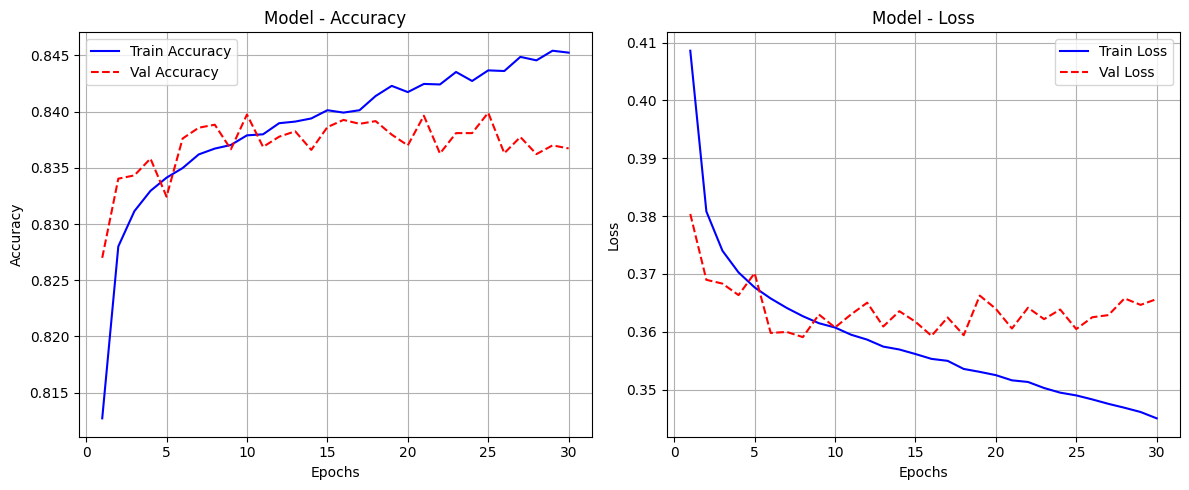

In [43]:
plot_learning_curves(history_rmsprop)


* *Training accuracy gradually climbs, and validation accuracy is also inching upward.*
* *Both training and validation loss are trending down*

---

2. **AdamW**

In [83]:
from tensorflow.keras.optimizers import AdamW

model_adamw = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')])

model_adamw.compile(optimizer=AdamW(learning_rate=0.001),loss='binary_crossentropy',
  metrics=['accuracy'])

In [84]:
history_adamw=model_adamw.fit(X_train, y_train,epochs=30,validation_data=(X_val, y_val),
    batch_size=256,verbose=1)

Epoch 1/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7882 - loss: 0.4428 - val_accuracy: 0.8282 - val_loss: 0.3778
Epoch 2/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8284 - loss: 0.3793 - val_accuracy: 0.8336 - val_loss: 0.3692
Epoch 3/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8325 - loss: 0.3719 - val_accuracy: 0.8356 - val_loss: 0.3663
Epoch 4/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8325 - loss: 0.3688 - val_accuracy: 0.8382 - val_loss: 0.3611
Epoch 5/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8367 - loss: 0.3632 - val_accuracy: 0.8376 - val_loss: 0.3598
Epoch 6/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8358 - loss: 0.3630 - val_accuracy: 0.8380 - val_loss: 0.3610
Epoch 7/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8360 - loss: 0.3625 - val_accuracy: 0.8379 - val_loss: 0.3600
Epoch 8/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8382 - loss: 0.3609 - val_accuracy: 0.

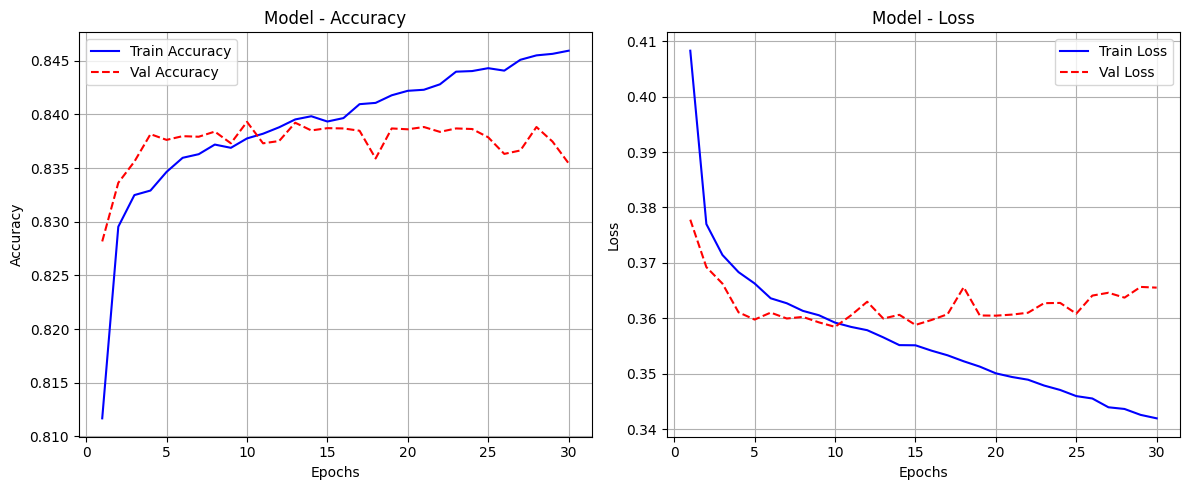

In [85]:
plot_learning_curves(history_adamw)

* *Validation accuracy seems more consistent here.*

* *Validation loss remains relatively stable around 0.36.*

---

* **Nadam (Adam + Nesterov momentum)**

In [47]:
from tensorflow.keras.optimizers import Nadam

from tensorflow.keras.optimizers import RMSprop

model_nadam = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_nadam.compile(optimizer=Nadam(learning_rate=0.001),loss='binary_crossentropy',
    metrics=['accuracy'])


In [48]:
history_nadam=model_nadam.fit(X_train, y_train,epochs=30,validation_data=(X_val, y_val),
    batch_size=256,verbose=1)

Epoch 1/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7908 - loss: 0.4388 - val_accuracy: 0.8285 - val_loss: 0.3797
Epoch 2/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8301 - loss: 0.3781 - val_accuracy: 0.8342 - val_loss: 0.3698
Epoch 3/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8323 - loss: 0.3717 - val_accuracy: 0.8371 - val_loss: 0.3624
Epoch 4/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8334 - loss: 0.3684 - val_accuracy: 0.8346 - val_loss: 0.3684
Epoch 5/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8357 - loss: 0.3663 - val_accuracy: 0.8373 - val_loss: 0.3616
Epoch 6/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8365 - loss: 0.3633 - val_accuracy: 0.8381 - val_loss: 0.3608
Epoch 7/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8359 - loss: 0.3633 - val_accuracy: 0.8388 - val_loss: 0.3609
Epoch 8/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8364 - loss: 0.3619 - val_accuracy: 0.

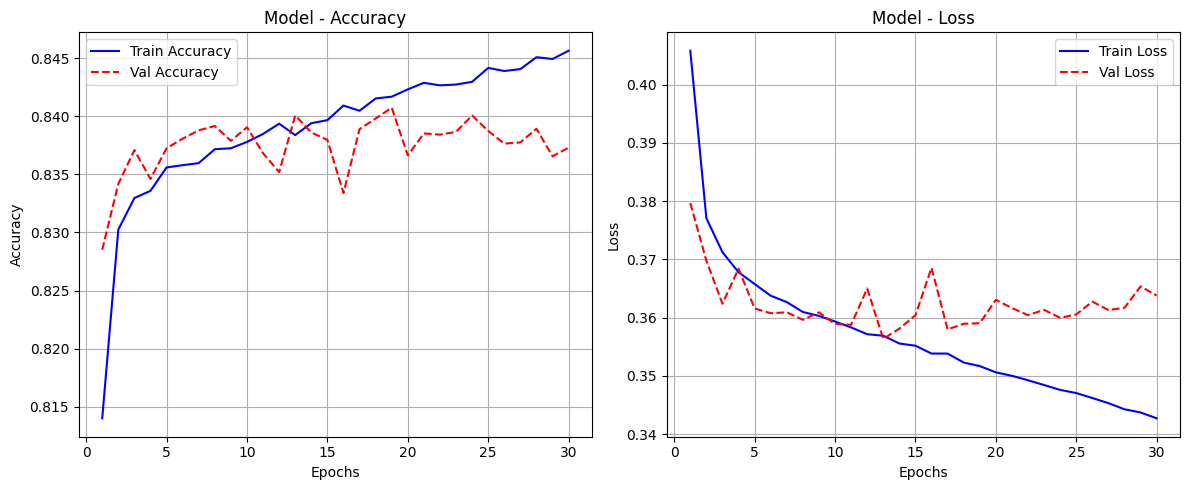

In [49]:
plot_learning_curves(history_nadam)

* *Validation accuracy now hovers around 0.84+ with even less volatility.*

* *Validation loss looks steady around 0.35*

---

##Testing Model On Different Activations:

---

1. **LeakyReLU Version:**

In [52]:
model_leakyrelu = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')])

model_leakyrelu.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',
    metrics=['accuracy'])

In [53]:
history_leakyrelu=model_leakyrelu.fit(X_train, y_train,epochs=30,validation_data=(X_val, y_val),
    batch_size=256,verbose=1)

Epoch 1/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7852 - loss: 0.4466 - val_accuracy: 0.8311 - val_loss: 0.3743
Epoch 2/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8279 - loss: 0.3799 - val_accuracy: 0.8341 - val_loss: 0.3674
Epoch 3/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8319 - loss: 0.3738 - val_accuracy: 0.8367 - val_loss: 0.3627
Epoch 4/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8324 - loss: 0.3693 - val_accuracy: 0.8370 - val_loss: 0.3643
Epoch 5/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8333 - loss: 0.3683 - val_accuracy: 0.8358 - val_loss: 0.3631
Epoch 6/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8367 - loss: 0.3637 - val_accuracy: 0.8362 - val_loss: 0.3634
Epoch 7/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8358 - loss: 0.3626 - val_accuracy: 0.8382 - val_loss: 0.3608
Epoch 8/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8370 - loss: 0.3604 - val_accuracy: 0

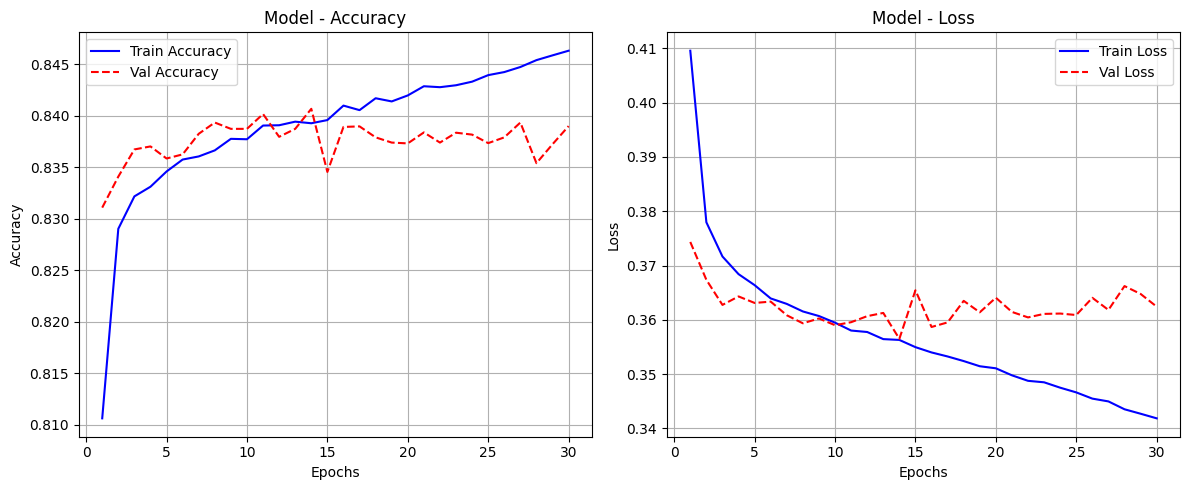

In [54]:
plot_learning_curves(history_leakyrelu)

* *Validation accuracy now hovers around 0.84-0.845*
* *Training loss dips under 0.345, while validation loss flattens around 0.36.*

----

2. **AdamW + SELU Activation**

In [55]:
model_adamw_selu = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='selu'),
    Dense(128, activation='selu'),
    Dense(1, activation='sigmoid')])

model_adamw_selu.compile(optimizer=AdamW(learning_rate=0.001),loss='binary_crossentropy',
    metrics=['accuracy'])

In [56]:
history_adamw_selu=model_adamw_selu.fit(X_train, y_train,epochs=30,validation_data=(X_val, y_val),
    batch_size=256,verbose=1)

Epoch 1/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7650 - loss: 0.4774 - val_accuracy: 0.8153 - val_loss: 0.3990
Epoch 2/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8200 - loss: 0.3947 - val_accuracy: 0.8275 - val_loss: 0.3805
Epoch 3/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8243 - loss: 0.3869 - val_accuracy: 0.8273 - val_loss: 0.3769
Epoch 4/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8271 - loss: 0.3798 - val_accuracy: 0.8321 - val_loss: 0.3697
Epoch 5/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8281 - loss: 0.3796 - val_accuracy: 0.8329 - val_loss: 0.3703
Epoch 6/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8289 - loss: 0.3783 - val_accuracy: 0.8328 - val_loss: 0.3700
Epoch 7/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8315 - loss: 0.3730 - val_accuracy: 0.8352 - val_loss: 0.3672
Epoch 8/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8314 - loss: 0.3723 - val_accuracy: 0.

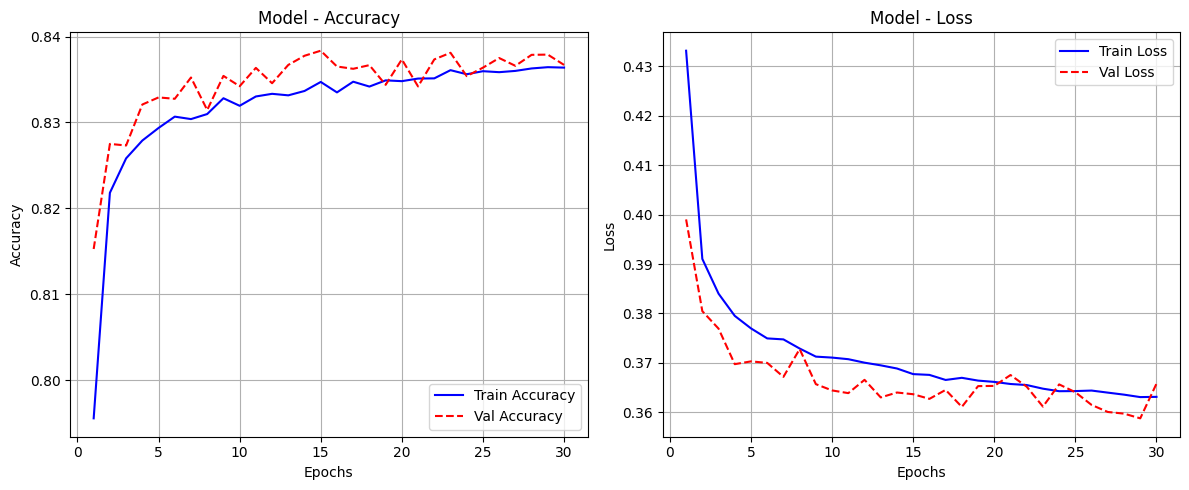

In [57]:
plot_learning_curves(history_adamw_selu)

* *Both training and validation accuracy track almost identically, climbing fast early on and then plateauing just above 0.83.*

* *There is a rapid descent in the first 10 epochs followed by  flattening around 0.36–0.37*
---

##Testing Out Regularization Techniques

---

1.**Batch Normalization**


In [58]:
from tensorflow.keras.layers import BatchNormalization

model_bn = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')])

model_bn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [59]:
history_model_bn=model_bn.fit(X_train, y_train,epochs=30,validation_data=(X_val, y_val),
    batch_size=256,verbose=1)

Epoch 1/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7897 - loss: 0.4451 - val_accuracy: 0.8255 - val_loss: 0.3821
Epoch 2/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8261 - loss: 0.3829 - val_accuracy: 0.8324 - val_loss: 0.3735
Epoch 3/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8297 - loss: 0.3757 - val_accuracy: 0.8354 - val_loss: 0.3648
Epoch 4/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8321 - loss: 0.3708 - val_accuracy: 0.8351 - val_loss: 0.3647
Epoch 5/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8323 - loss: 0.3713 - val_accuracy: 0.8370 - val_loss: 0.3608
Epoch 6/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8311 - loss: 0.3696 - val_accuracy: 0.8356 - val_loss: 0.3617
Epoch 7/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8339 - loss: 0.3664 - val_accuracy: 0.8384 - val_loss: 0.3606
Epoch 8/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8349 - loss: 0.3640 - val_accuracy: 

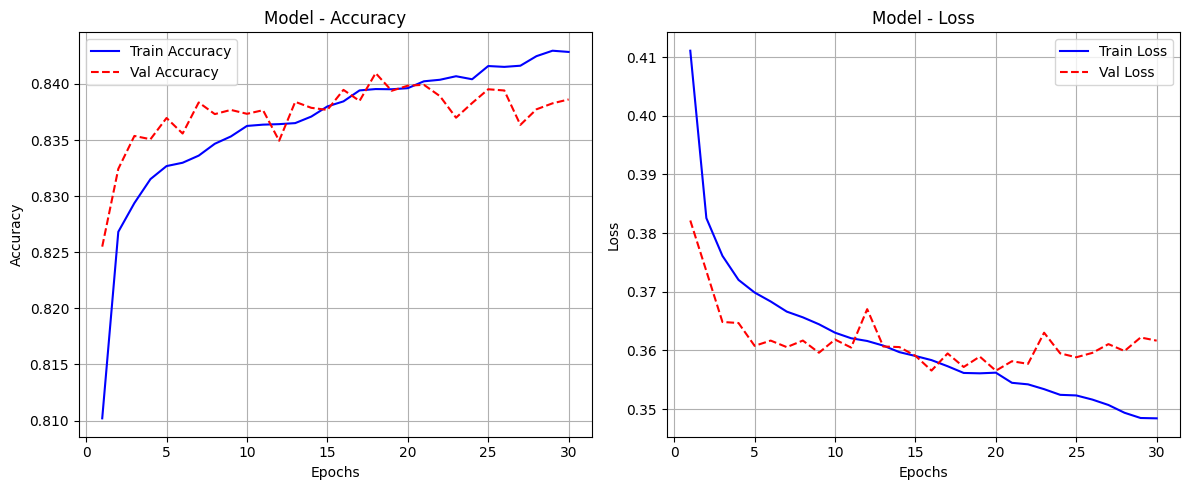

In [60]:
plot_learning_curves(history_model_bn)

* *Training and validation accuracy steadily rise and then plateau in sync just above 0.84*

* *Both training and validation loss drop from ~0.405 to ~0.345–0.355 and flatten together*

2. **Dropout Model**

In [61]:
from tensorflow.keras.layers import Dropout

model_dropout = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')])

model_dropout.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
history_dropout=model_dropout.fit(X_train, y_train,epochs=30,validation_data=(X_val, y_val),
    batch_size=256,verbose=1)

Epoch 1/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7748 - loss: 0.4667 - val_accuracy: 0.8270 - val_loss: 0.3810
Epoch 2/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8209 - loss: 0.3973 - val_accuracy: 0.8322 - val_loss: 0.3733
Epoch 3/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8236 - loss: 0.3905 - val_accuracy: 0.8348 - val_loss: 0.3680
Epoch 4/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8273 - loss: 0.3848 - val_accuracy: 0.8370 - val_loss: 0.3645
Epoch 5/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8284 - loss: 0.3812 - val_accuracy: 0.8365 - val_loss: 0.3641
Epoch 6/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8275 - loss: 0.3811 - val_accuracy: 0.8360 - val_loss: 0.3647
Epoch 7/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8307 - loss: 0.3780 - val_accuracy: 0.8368 - val_loss: 0.3648
Epoch 8/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8296 - loss: 0.3767 - val_accuracy: 0

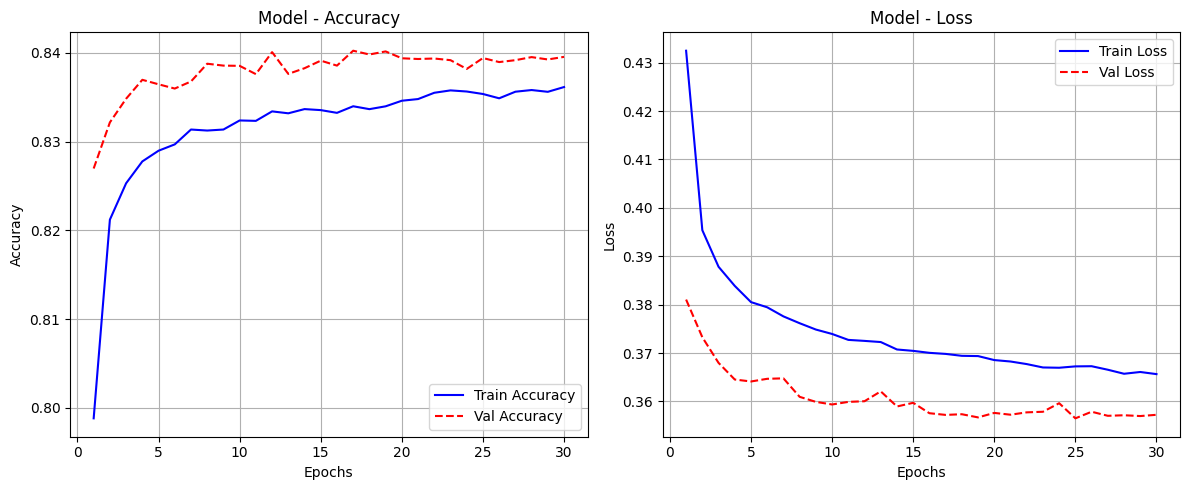

In [63]:
plot_learning_curves(history_dropout)

* *Training accuracy  climbs past 0.83, while validation accuracy remains slightly higher, around 0.84.*

* *Training loss continues its descent to ~0.36, while validation loss trails just behind.*

---

3. **L2 Regularization**

In [64]:
from tensorflow.keras.regularizers import l2

model_l2 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1, activation='sigmoid')])

model_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
history_l2=model_l2.fit(X_train, y_train,epochs=30,validation_data=(X_val, y_val),
    batch_size=256,verbose=1)

Epoch 1/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7863 - loss: 0.5816 - val_accuracy: 0.8226 - val_loss: 0.4301
Epoch 2/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8219 - loss: 0.4245 - val_accuracy: 0.8296 - val_loss: 0.4038
Epoch 3/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8266 - loss: 0.4049 - val_accuracy: 0.8335 - val_loss: 0.3900
Epoch 4/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8297 - loss: 0.3983 - val_accuracy: 0.8284 - val_loss: 0.3975
Epoch 5/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8310 - loss: 0.3915 - val_accuracy: 0.8311 - val_loss: 0.3880
Epoch 6/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8319 - loss: 0.3894 - val_accuracy: 0.8318 - val_loss: 0.3850
Epoch 7/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8298 - loss: 0.3887 - val_accuracy: 0.8344 - val_loss: 0.3809
Epoch 8/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8314 - loss: 0.3867 - val_accuracy: 0

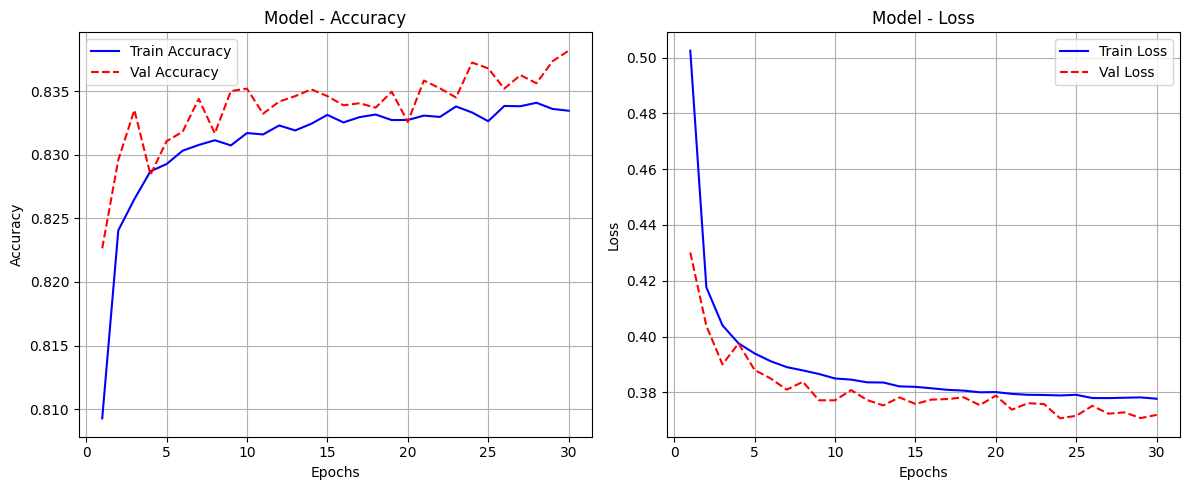

In [66]:
plot_learning_curves(history_l2)

* *Training accuracy is steadily rising from ~0.81 to 0.83+, and validation is clinging just above.*

* *Training loss glides down from 0.50 to just under 0.38, while validation loss mirrors it closely*

---

4.**L1 Regularization**

In [67]:
from tensorflow.keras.regularizers import l1

model_l1 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu', kernel_regularizer=l1(0.001)),
    Dense(128, activation='relu', kernel_regularizer=l1(0.001)),
    Dense(1, activation='sigmoid')
])

model_l1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [68]:
history_l1=model_l1.fit(X_train, y_train,epochs=30,validation_data=(X_val, y_val),
    batch_size=256,verbose=1)

Epoch 1/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7736 - loss: 1.2973 - val_accuracy: 0.8146 - val_loss: 0.4639
Epoch 2/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8161 - loss: 0.4597 - val_accuracy: 0.8194 - val_loss: 0.4430
Epoch 3/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8191 - loss: 0.4434 - val_accuracy: 0.8230 - val_loss: 0.4289
Epoch 4/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8207 - loss: 0.4355 - val_accuracy: 0.8248 - val_loss: 0.4241
Epoch 5/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8218 - loss: 0.4299 - val_accuracy: 0.8251 - val_loss: 0.4201
Epoch 6/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8232 - loss: 0.4233 - val_accuracy: 0.8258 - val_loss: 0.4190
Epoch 7/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8226 - loss: 0.4236 - val_accuracy: 0.8273 - val_loss: 0.4161
Epoch 8/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8247 - loss: 0.4191 - val_accuracy: 0.

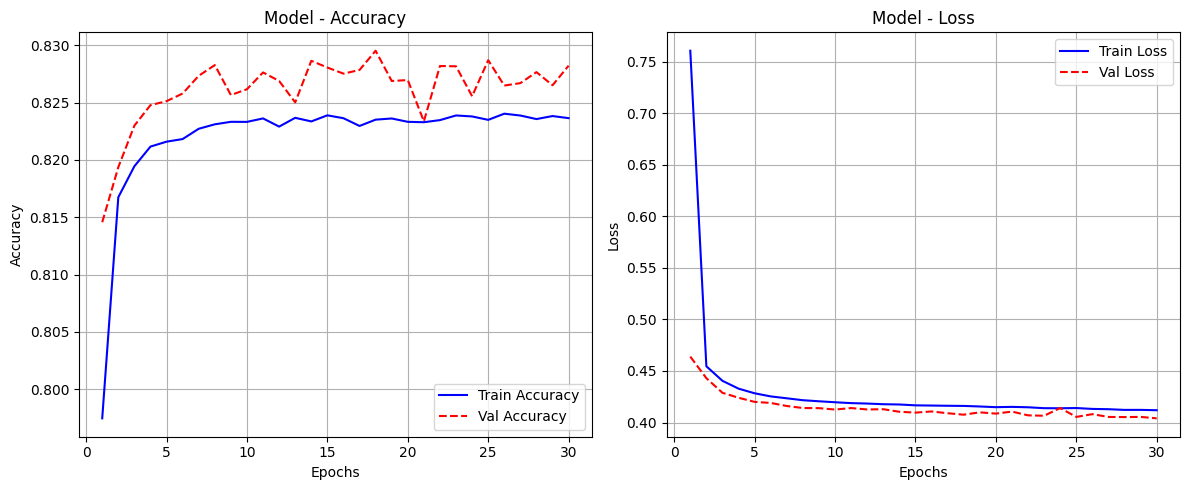

In [69]:
plot_learning_curves(history_l1)

* *Validation accuracy begins at around 0.815—and flutters between 0.815 and 0.830.*

* *Training and validation losses both falls early  and then settles around 0.40 by the end*

---

5. **Batch Normalization + Dropout**

In [70]:
model_bn_dropout = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='sigmoid')])


model_bn_dropout.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',
    metrics=['accuracy'])

In [71]:
history_bn_dropout=model_bn_dropout.fit(X_train, y_train,epochs=30,validation_data=(X_val, y_val),
    batch_size=256,verbose=1)

Epoch 1/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7513 - loss: 0.5185 - val_accuracy: 0.8253 - val_loss: 0.3804
Epoch 2/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8166 - loss: 0.4026 - val_accuracy: 0.8285 - val_loss: 0.3747
Epoch 3/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8215 - loss: 0.3923 - val_accuracy: 0.8350 - val_loss: 0.3658
Epoch 4/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8252 - loss: 0.3877 - val_accuracy: 0.8349 - val_loss: 0.3660
Epoch 5/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8268 - loss: 0.3832 - val_accuracy: 0.8373 - val_loss: 0.3628
Epoch 6/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8289 - loss: 0.3796 - val_accuracy: 0.8371 - val_loss: 0.3626
Epoch 7/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8286 - loss: 0.3791 - val_accuracy: 0.8376 - val_loss: 0.3612
Epoch 8/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8308 - loss: 0.3754 - val_accuracy:

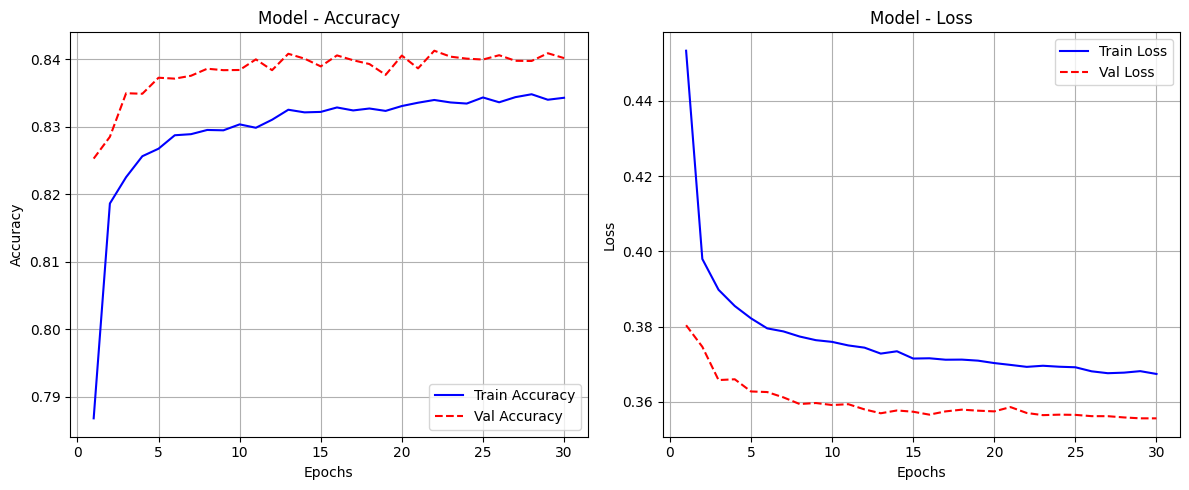

In [72]:
plot_learning_curves(history_bn_dropout)

* *Training accuracy climbs steadily from ~0.795 to ~0.825, while validation accuracy rises upto 0.84*

* *Training loss descends from 0.44 to  under 0.37, and validation loss dips in tandem, flattening around 0.36.*

---

## Experimenting with Callbacks:

---

* **Reduce LR on Plateau**

  **Model Checkpoint**

  **Early Stop**


In [73]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=3,verbose=1,min_lr=1e-6)

checkpoint = ModelCheckpoint('best_higgs_model.keras',monitor='val_loss',save_best_only=True,verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=7,restore_best_weights=True,verbose=1)


In [74]:
model_callbacks=Sequential([Input(shape=(X_train.shape[1],)),
                            Dense(256,activation='relu'),
                            Dense(128,activation='relu'),
                            Dense(1,activation='sigmoid')])

model_callbacks.compile(optimizer=Adam(learning_rate=0.001),metrics=['accuracy'],loss='binary_crossentropy')

In [75]:
history_callbacks=model_callbacks.fit(X_train, y_train,epochs=30,validation_data=(X_val, y_val),
    batch_size=256,verbose=1,callbacks=[reduce_lr,checkpoint,early_stop])

Epoch 1/30
677/684 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7900 - loss: 0.4412
Epoch 1: val_loss improved from inf to 0.37758, saving model to best_higgs_model.keras
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7903 - loss: 0.4408 - val_accuracy: 0.8302 - val_loss: 0.3776 - learning_rate: 0.0010
Epoch 2/30
674/684 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8265 - loss: 0.3820
Epoch 2: val_loss improved from 0.37758 to 0.36787, saving model to best_higgs_model.keras
684/684 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8265 - loss: 0.3819 - val_accuracy: 0.8340 - val_loss: 0.3679 - learning_rate: 0.0010
Epoch 3/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8312 - loss: 0.3727
Epoch 3: val_loss improved from 0.36787 to 0.36341, saving model to best_higgs_model.keras
684/684 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8312 - loss: 0.3727 - val_accuracy: 0.8363 - val_loss: 0.3634 - learning_rate: 0.0010
Epoch 4/30
671/684 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/ste

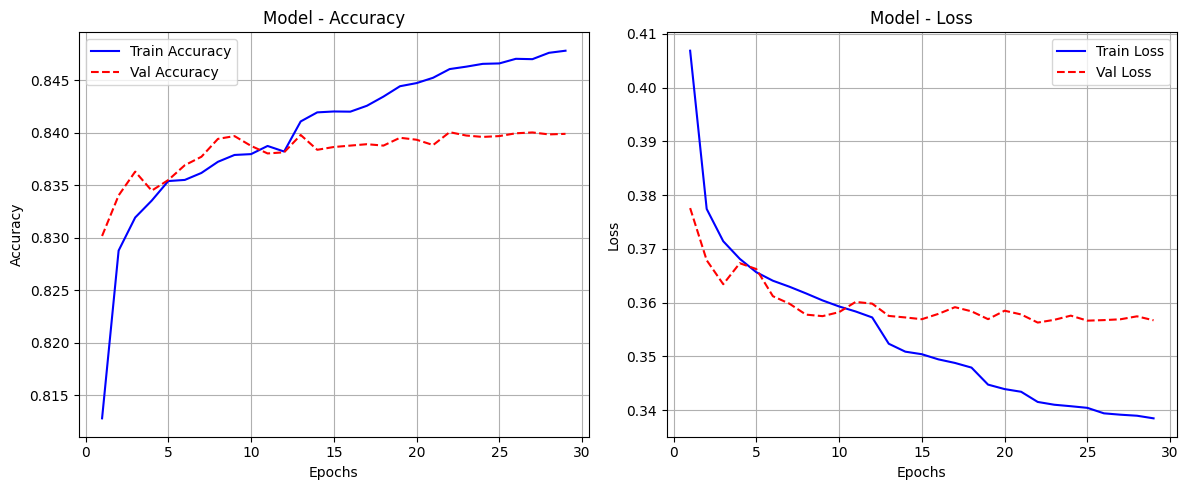

In [76]:
plot_learning_curves(history_callbacks)

* *Validation accuracy leads slightly at first (~0.815) and hovers around 0.83–0.835*

* *Training loss drops from ~0.44 to ~0.375, and validation loss parallels it closely.*

----

## Learning Rate Experimentation

---

In [10]:
def build_lr_model():
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

In [13]:
import tensorflow as tf

learning_rates = {
    'Low LR (1e-5)': 1e-5,
    'Medium LR (1e-3)': 1e-3,
    'High LR (1e-1)': 1e-1}

# histories for each LR
histories_lr = {}

# Define the model builder
def build_lr_model():
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Train models with different learning rates
for label, lr in learning_rates.items():
    print(f"\nTraining with {label}")

    model = build_lr_model()

    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=30,
        batch_size=256,
        verbose=0
    )

    histories_lr[label] = history
    print(f"Completed training with {label}")


Training with Low LR (1e-5)
Completed training with Low LR (1e-5)

Training with Medium LR (1e-3)
Completed training with Medium LR (1e-3)

Training with High LR (1e-1)
Completed training with High LR (1e-1)


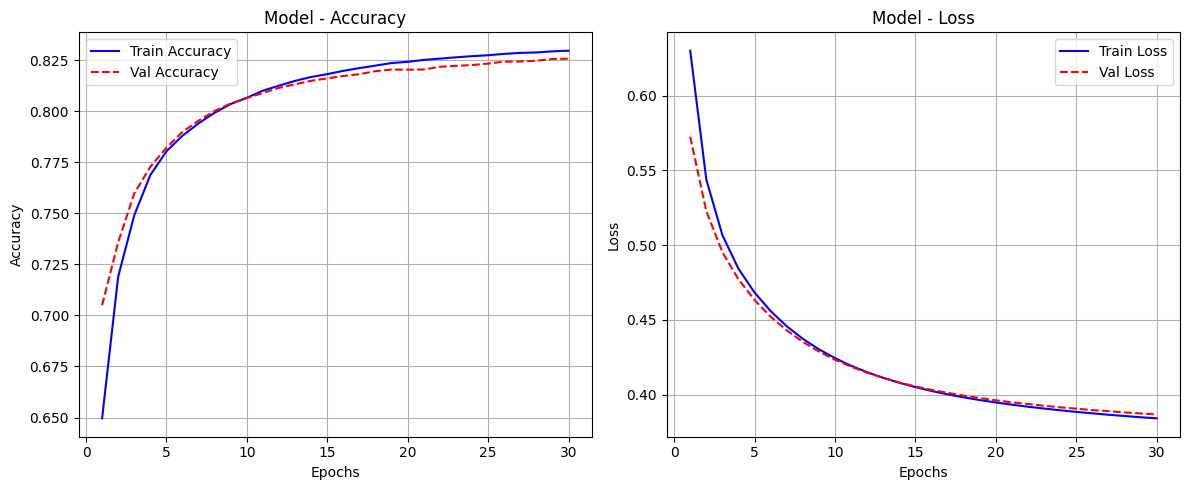

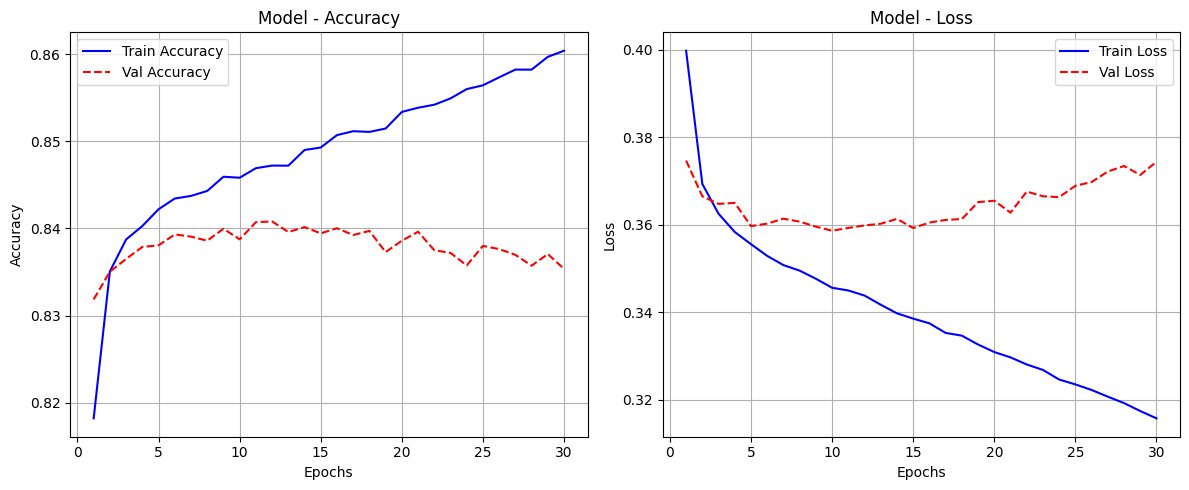

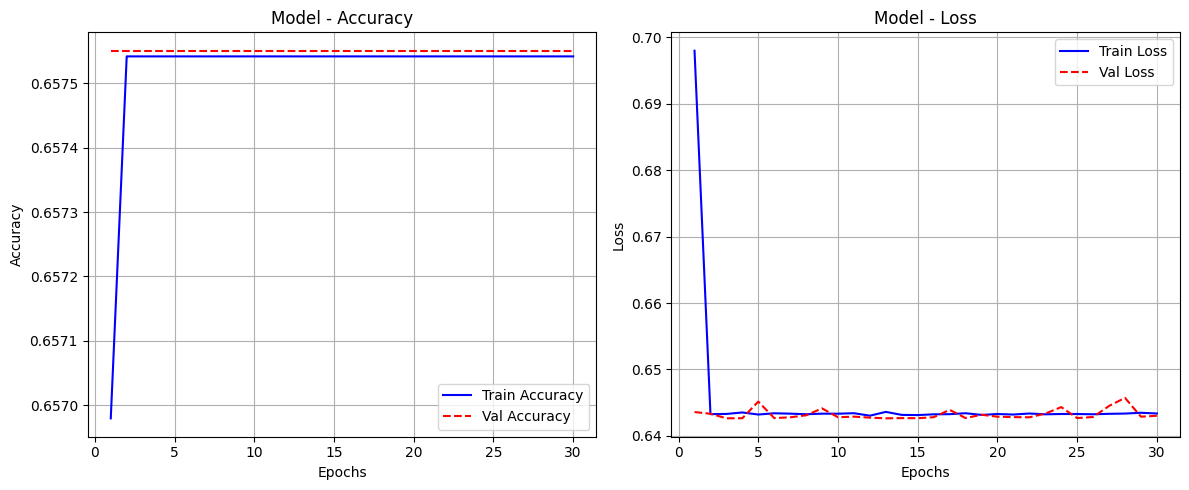

In [15]:
for label, history in histories_lr.items():
    plot_learning_curves(history)
    title = f'{label} Learning Rate'

##Tree-Based Baseline

---


In [79]:
!pip install xgboost -q
import xgboost as xgb


In [80]:
xgb_model = xgb.XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=6,subsample=0.8,colsample_bytree=0.8,
    random_state=42,use_label_encoder=False,eval_metric='logloss')


xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:48:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [87]:
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

In [86]:
models = {
    'Baseline MLP': baseline_model,
    'Deep MLP': Deep_mlp,
    'RMSprop': model_rmsprop,
    'AdamW': model_adamw,
    'Nadam': model_nadam,
    'LeakyReLU': model_leakyrelu,
    'AdamW + SELU': model_adamw_selu,
    'Batch Normalization': model_bn,
    'Dropout': model_dropout,
    'L2 Regularization': model_l2,
    'L1 Regularization': model_l1,
    'Batch Normalization + Dropout': model_bn_dropout,
    'Callbacks Model': model_callbacks,
    'XGBoost': xgb_model
}

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

for name, model in models.items():
    print(f" Evaluating: {name}")


    if name == 'XGBoost':
        y_pred = model.predict(X_test)
    else:

        y_pred_prob = model.predict(X_test)
        y_pred = (y_pred_prob > 0.5).astype(int).ravel()


    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)


    results['Model'].append(name)
    results['Accuracy'].append(acc)
    results['Precision'].append(prec)
    results['Recall'].append(rec)
    results['F1 Score'].append(f1)


results_df = pd.DataFrame(results)


results_df = results_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)


print("\n Model Performance Summary:")
results_df


 Evaluating: Baseline MLP
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
 Evaluating: Deep MLP
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
 Evaluating: RMSprop
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
 Evaluating: AdamW
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
 Evaluating: Nadam
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
 Evaluating: LeakyReLU
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
 Evaluating: AdamW + SELU
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
 Evaluating: Batch Normalization
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
 Evaluating: Dropout
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
 Evaluating: L2 Regularization
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
 Evaluating: L1 Regularization
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
 Evaluating: Batch Normalization + Dropout
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
 Evaluating: Callbacks Model
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
 Evaluating: XGBoost

 Model Performance Summary:


,Model,Accuracy,Precision,Recall,F1 Score
0,XGBoost,0.841547,0.791970,0.729105,0.759238
1,Deep MLP,0.832373,0.765964,0.735564,0.750457
2,Callbacks Model,0.836373,0.787907,0.714942,0.749653
3,Batch Normalization + Dropout,0.836373,0.791356,0.709572,0.748236
4,AdamW + SELU,0.832133,0.771249,0.725214,0.747523
5,Nadam,0.833360,0.782311,0.711751,0.745365
6,Dropout,0.835520,0.796556,0.698366,0.744236
7,AdamW,0.833467,0.788201,0.702879,0.743099
8,Batch Normalization,0.834587,0.795711,0.695953,0.742497
9,LeakyReLU,0.833067,0.793829,0.692763,0.739860


In [91]:
from sklearn.metrics import confusion_matrix

In [90]:
def plot_confusion(cm, model_name):
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

Confusion Matrix for: Baseline MLP
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


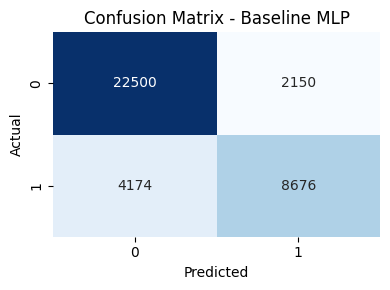

Confusion Matrix for: Deep MLP
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


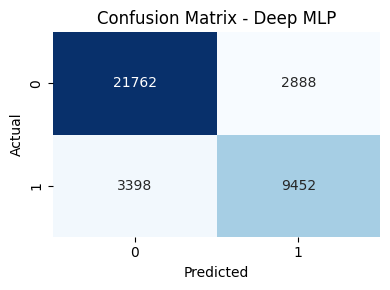

Confusion Matrix for: RMSprop
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


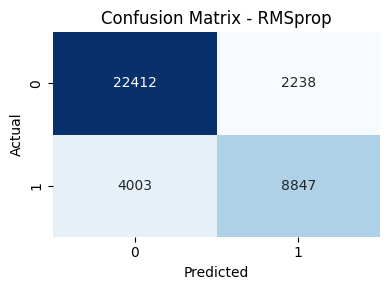

Confusion Matrix for: AdamW
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


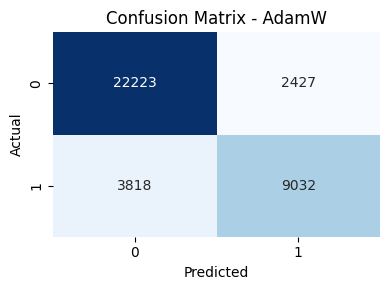

Confusion Matrix for: Nadam
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


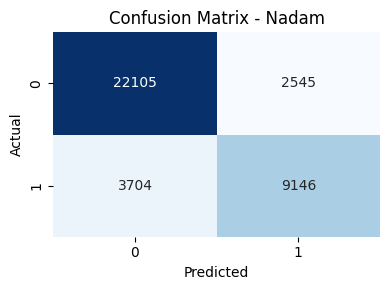

Confusion Matrix for: LeakyReLU
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


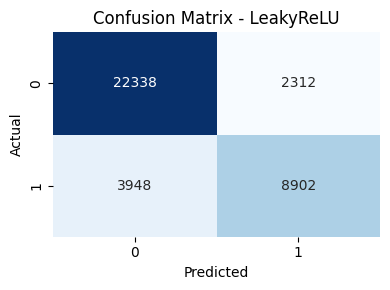

Confusion Matrix for: AdamW + SELU
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


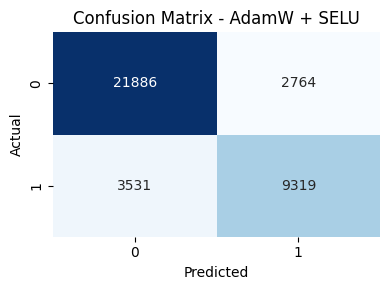

Confusion Matrix for: Batch Normalization
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


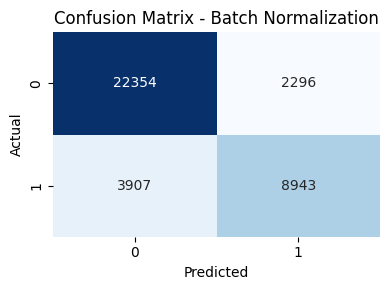

Confusion Matrix for: Dropout
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


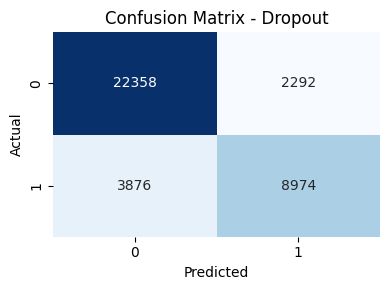

Confusion Matrix for: L2 Regularization
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


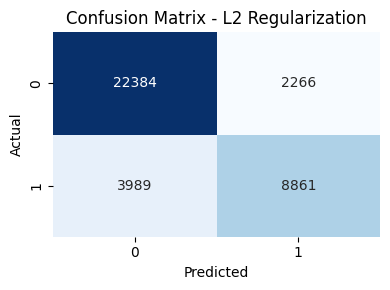

Confusion Matrix for: L1 Regularization
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


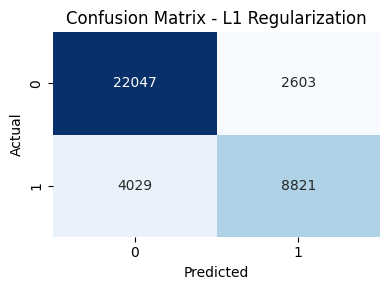

Confusion Matrix for: Batch Normalization + Dropout
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


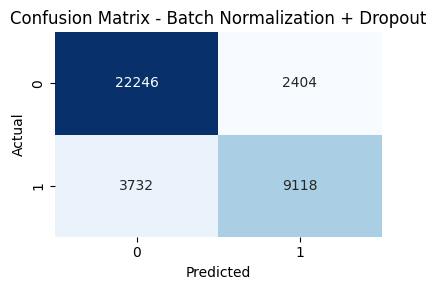

Confusion Matrix for: Callbacks Model
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


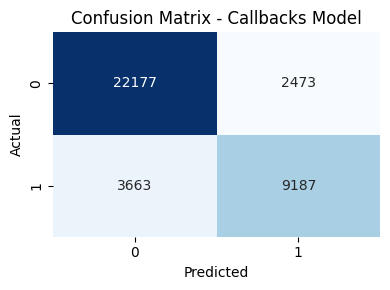

Confusion Matrix for: XGBoost


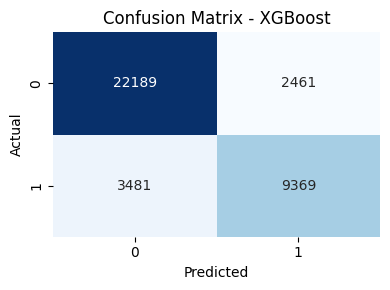

In [92]:
for name, model in models.items():
    print(f"Confusion Matrix for: {name}")


    if name == 'XGBoost':
        y_pred = model.predict(X_test)
    else:
        y_pred_prob = model.predict(X_test)
        y_pred = (y_pred_prob > 0.5).astype(int).ravel()


    cm = confusion_matrix(y_test, y_pred)


    plot_confusion(cm, name)

In [93]:
from sklearn.metrics import roc_curve, auc

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


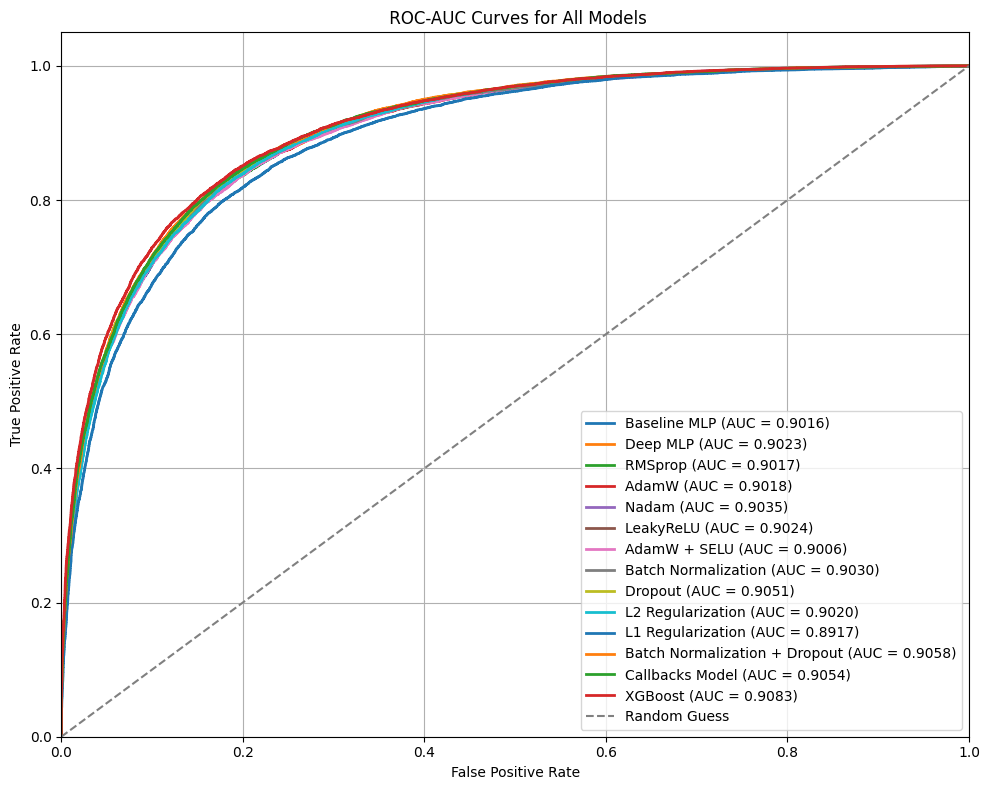

In [94]:
plt.figure(figsize=(10, 8))

for name, model in models.items():

    if name == 'XGBoost':
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.predict(X_test).ravel()


    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)


    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC-AUC Curves for All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

##Summary:

---
* XGBoost is clearly the top-performing model.It's particularly strong in precision and F1-score, which means it is not only making correct predictions, but it's also doing well at identifying both positive and negative classes

* Deep learning models with dropout, callbacks, or batch normalization show competitive performance but slightly lag behind XGBoost.

* Simpler regularization (like L1) underperforms here, suggesting more complex or ensemble methods are more effective.

##Reflection:

---

1. How did model depth and activation affect performance?

 A. *'Model Depth'* :

  Deeper and wider configuration achieved slightly higher validation accuracy and narrowly lower validation loss compared to Baseline MLP.This suggests that increasing depth and width ,though slight positive,but had no drastic impact on performance.
  
  *Activation Functions (LeakyReLU and SELU):*

   The alternative activations didn't provide a significant performance boost on the validation set in this specific setup. LeakyReLU appeared to maintain a slightly higher validation accuracy than SELU.

2. What helped mitigate overfitting?

  A. *Batch Normalization* helped stabilize training and reduced overfitting compared to mdels without it.
  *L2 Regularization* model showed training and validation loss mirroring each other,which indicates L2 is penalizing large weights and preventing overfitting.

  *Early Stopping* with its ability to monitor validation loss to a point of no improvemnet prevented overfitting.

3. How did the learning rate and optimizer affect convergence?   

 A. *Learning Rate* : Higher leaning rate can lead to faster convergence,but in this case potential instability was observed in both training and validation loss.Medium learning rate appeared to offer convergence.

 *Optimizer* The model using RMSprop,AdamW, and Nadam showed different convergence behaviors. Nadam showed more stable validation metrics.

4. What would you improve with more time or compute?

  A. With more time and compute resources,other potential methods of improvement could have been:

  * Grid search to highlight better hyperparameters e.g learning rate schedules(step decay etc), different optimizer parameters or dropout rates.
  
  * Feature Engineering to investigate potential interactions between features.

  * Consulting researchers or self study to obtain more domain knowledge to flag  most influential features. Higgs Boson data compilation is a powerful discovery itself, with several features being key aspects in determining the presence of higgs particle  e.g proton collision mass. Obtaining domain knowledge will play productive role in improving predictions.